<a href="https://colab.research.google.com/github/rohinish404/learning_pytorch/blob/master/pytorch_classification_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import sklearn

In [65]:
from sklearn.datasets import make_moons  
n_samples=1000
X,y = make_moons(n_samples,
                   noise = 0.03,
                   random_state=42)

In [66]:
len(X)

1000

In [67]:
X[:10]

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       [ 0.41276802, -0.37638459],
       [-0.84532016,  0.52879908],
       [ 0.57954249, -0.35297867],
       [ 0.29488426, -0.20923768],
       [-0.01448804,  0.4358961 ],
       [ 1.62651037, -0.28120742],
       [ 0.67159767,  0.78642227]])

In [68]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [69]:
import pandas as pd
moons = pd.DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                        "label":y})

In [70]:
moons.head()

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


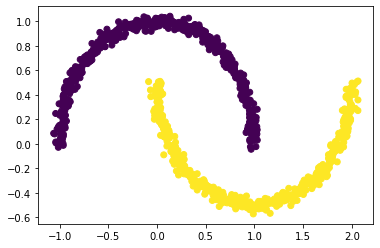

In [71]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y)

In [72]:
import torch
torch.__version__

'1.13.1+cu116'

In [73]:
type(X)

numpy.ndarray

In [74]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [75]:
type(X)

torch.Tensor

In [76]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [77]:

import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [78]:
class ModelMoons(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=1)
        )

    def forward(self, x):
        return self.layer_stack(x)

model_1 = ModelMoons().to(device)
model_1

ModelMoons(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [79]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01) 

In [80]:
def accuracy_fn(y_true, y_pred):

  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [86]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(X_train.to(device))
    y_pred = torch.round(torch.sigmoid(y_logits)).squeeze()

    loss = loss_fn(y_logits, y_train.unsqueeze(1))
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test)
        test_pred = torch.round(torch.sigmoid(test_logits)).squeeze()

        test_loss = loss_fn(test_logits, y_test.unsqueeze(1))
        test_acc = accuracy_fn(y_true=y_test.squeeze(), y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.62460, Accuracy: 76.12% | Test loss: 0.63109, Test acc: 69.00
Epoch: 10 | Loss: 0.62165, Accuracy: 75.88% | Test loss: 0.62841, Test acc: 69.50
Epoch: 20 | Loss: 0.61862, Accuracy: 75.88% | Test loss: 0.62566, Test acc: 70.00
Epoch: 30 | Loss: 0.61550, Accuracy: 75.88% | Test loss: 0.62283, Test acc: 70.00
Epoch: 40 | Loss: 0.61229, Accuracy: 75.75% | Test loss: 0.61991, Test acc: 70.00
Epoch: 50 | Loss: 0.60898, Accuracy: 75.50% | Test loss: 0.61692, Test acc: 70.00
Epoch: 60 | Loss: 0.60559, Accuracy: 75.50% | Test loss: 0.61383, Test acc: 70.00
Epoch: 70 | Loss: 0.60210, Accuracy: 75.62% | Test loss: 0.61066, Test acc: 70.50
Epoch: 80 | Loss: 0.59852, Accuracy: 75.50% | Test loss: 0.60740, Test acc: 71.00
Epoch: 90 | Loss: 0.59485, Accuracy: 75.38% | Test loss: 0.60404, Test acc: 71.00
